<a href="https://colab.research.google.com/github/carmsanchezs/DataCamp-Courses/blob/main/Analyzing_police_activity_with_pandas/Analyzing_police_activity_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Analyzing Police Activity with pandas**
Data Camp Course
---



## **Preparando los datos para su análisis**

Antes de iniciar nuestro análisis, es importante exáminar y limpiar los datos, para que trabajar con ellos sea un proceso más eficiente.

### Agregando librerias

In [ ]:
# importando librerias
import pandas as pd
import matplotlib.pyplot as plt

### Cargando los datos

* examine the data
Each row represents one traffic **stop**

In [ ]:
# cargando información y explorando los primeros registros
ri = pd.read_csv('https://raw.githubusercontent.com/carmsanchezs/DSFem_projects_to_practices/8327281c395981595fba63d94a17da0828838248/data/police.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


### Examinando el dataset
* revisar datos nulos
* revisar tipos de datos de las columnas y adecuar los tipos de datos si es necesario
* elegir el índice

In [ ]:
# analizando si existen datos nulos
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [ ]:
# analizando el total de registros 
ri.shape

(91741, 15)

#### Eliminando columnas
**county_name** sólo tiene datos nulos, así que será eliminada del DataFrame

In [ ]:
# eliminamos la columna county_name
ri.drop('county_name', axis='columns', inplace=True)
ri.head(3)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


#### Eliminando filas
stop_date y stop_time no contienen valores nulos, pero que pasaría si sí y si estos campos fueran clave para nuestro análisis. 

Una forma de eliminar registros con valores nulos en esos valores, porque de otra forma no nos servirían, es:

In [ ]:
# borrando registros cuyo valor sea nulo en las columnas stop_date y stop_time
ri.dropna(subset=['stop_date','stop_time'], inplace=True)
ri.shape

(91741, 14)

### Usando el "data type" adecuado

In [ ]:
# analiznado los tipos de datos
ri.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

* **object**: Python strings (u otros objetos de Python)
* **bool**: valores True y False 
* Otros tipos: **int**, **float**, **datetime**, **category**

Los tipos de datos importan porque afectan las operaciones que una Serie puede realizar


In [ ]:
# examinando los primeros registros de 'is_arrested'
ri.is_arrested.head()

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object

In [ ]:
# analizando el tipo de dato de is_arrested
ri.is_arrested.dtype

dtype('O')

In [ ]:
# convertimos is_arrested como tipo de dato boolean
ri['is_arrested'] = ri.is_arrested.astype('bool')
ri.is_arrested.dtype

dtype('bool')

Podemos ver que la fecha está en diferentes columnas: fecha y hora. Así que **combinaremos** las dos coulmnas en una columna y la convertiremos en **datetime**. Si el dato originalmente está en formato **month-day-year** no necesitamos epecificar nada.

Está última columna la convertiremos en indice (**DatetimeIndex**)

In [ ]:
# combinamos stop_date y stop_time para hacer una sola columna de fecha "stop_datetime"
# además convertimos el tipo de dato en datetime
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.dtypes

state                         object
stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

### Creando un DatatimeIndex

In [ ]:
# establecemos stop_datetime como nuevo índice
ri.set_index('stop_datetime', inplace=True)
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=91741, freq=None)

In [ ]:
# examinamos las columnas y observamos que la columna índice ya no aparece como columna
ri.columns

Index(['state', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

## **Explorando la relación entre género y vigilancia**
Examinaremos si el género del conductor tiene un impacto en el comportamiento del policia durante una parada de tráfico?


#### ¿Se comenten diferentes infracciones por género?

In [ ]:
# contabilizando las paradas de tráfico
ri.stop_outcome.value_counts()

Citation            77092
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [ ]:
# contabilizando con porcentajes
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890835
Warning             0.059361
Arrest Driver       0.031604
No Action           0.007222
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [ ]:
# sumando los conteos
ri.stop_outcome.value_counts().sum()

86539

In [ ]:
# verificando nuevamente los datos nulos
ri.stop_outcome.isnull().sum()

5202

In [ ]:
# comparando con el todal de datos, 86539 + 5202 = 91741
ri.shape

(91741, 14)

In [ ]:
# contabilizando ahora los conductores por raza
ri.driver_race.value_counts()

White       61872
Black       12285
Hispanic     9727
Asian        2390
Other         265
Name: driver_race, dtype: int64

In [ ]:
# sumando el total de datos
ri.driver_race.value_counts().sum()

86539

In [ ]:
# analizando sólo un conductores blancos
white = ri.query('driver_race == "White"')
white.shape

(61872, 14)

In [ ]:
# contando las paradas de tráfico para conductores blancos
white.stop_outcome.value_counts(normalize=True)

Citation            0.902234
Warning             0.057522
Arrest Driver       0.024017
No Action           0.007047
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [ ]:
# analizando conductores asiáticos
asian = ri.query('driver_race == "Asian"')
asian.shape

(2390, 14)

In [ ]:
# contando las paradas de tráfico de conductores asiáticos
asian.stop_outcome.value_counts(normalize=True)

Citation            0.923013
Warning             0.045188
Arrest Driver       0.017573
No Action           0.008368
N/D                 0.004184
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

In [ ]:
# contabilizando las infracciones
ri.violation.value_counts()

Speeding               48424
Moving violation       16224
Equipment              10922
Other                   4410
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [ ]:
# contabilizando con porcentajes
ri.violation.value_counts(normalize=True)

Speeding               0.559563
Moving violation       0.187476
Equipment              0.126209
Other                  0.050960
Registration/plates    0.042790
Seat belt              0.033002
Name: violation, dtype: float64

In [ ]:
# DataFrame de Mujeres
female = ri[ri.driver_gender == 'F']
female.shape

(23774, 14)

In [ ]:
# DataFrame de Hombres
male = ri[ri.driver_gender == 'M']
male.shape

(62762, 14)

In [ ]:
# total de infracciones de Mujeres
female.violation.value_counts().sum()

23774

In [ ]:
# total de infracciones de Hombres
male.violation.value_counts().sum()

62762

In [ ]:
# contabilizando infracciones de Mujeres
female.violation.value_counts(normalize=True)

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

In [ ]:
# contabilizando infracciones de Hombres
male.violation.value_counts(normalize=True)

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

#### ¿Obtener un ticket de infracción es afectado por el género?




In [ ]:
# DataFrame de Mujeres que han sido arrestadas
female_and_arrested = ri.query('driver_gender =="F" and is_arrested == True')
female_and_arrested.shape

(669, 14)

In [ ]:
male_and_arrested = ri.query('driver_gender =="M" and is_arrested == True')
male_and_arrested.shape

(2409, 14)

In [ ]:
# DataFrame de Mujeres o de personas arrestadas
female_or_arrested = ri[(ri.driver_gender == 'F') | (ri.is_arrested == True)]
female_or_arrested.shape

(31385, 14)

### Comparando infracciones por exceso de velocidad por género

In [ ]:
# DataFrame de mujeres conductoras detenidas por exceso de velocidad
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]
female_and_speeding.shape

(15646, 14)

In [ ]:
# DataFrame de hombres conductores detenidos por exceso de velocidad
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]
male_and_speeding.shape

(32777, 14)

In [ ]:
# contabilizando el porcentaje de "tickets" contra "warnings" en mujeres
female_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

In [ ]:
# contabilizando el porcentaje de "tickets" contra "warnings" en hombres
male_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

### ¿Afecta el género a quiénes se les registra el vehículo?

In [ ]:
# porcentaje de paradas de tráfico que resultan en arresto
ri.is_arrested.value_counts(normalize=True)

False    0.909746
True     0.090254
Name: is_arrested, dtype: float64

In [ ]:
# obtenemos el mismo resultado con mean()
ri.is_arrested.mean()

0.09025408486936048

In [ ]:
# esto funciona porque el tipo de dato es boolean
ri.is_arrested.dtype

dtype('bool')

In [ ]:
# sacamos los distritos que existen en nuestro dataset
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [ ]:
# para sacar la tasa de arrestros por distrito, podemos sacarlo uno por uno
ri[ri.district == 'Zone K1'].is_arrested.mean()

0.06718137819774142

In [ ]:
ri[ri.district == 'Zone K2'].is_arrested.mean()

0.06952220470728923

In [ ]:
# o podemos usar la función groupby para obtener la tasa de arrestos de los 6 distritos
ri.groupby('district').is_arrested.mean()

district
Zone K1    0.067181
Zone K2    0.069522
Zone K3    0.072286
Zone X1    0.230044
Zone X3    0.082466
Zone X4    0.117674
Name: is_arrested, dtype: float64

In [ ]:
# podemos agrupar diferentes categorias a la vez
ri.groupby(['district', 'driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [ ]:
# aquí tenemos el mismo resultado con otra mejor presentación
ri.groupby(['driver_gender', 'district']).is_arrested.mean()

driver_gender  district
F              Zone K1     0.019169
               Zone K2     0.022196
               Zone K3     0.025156
               Zone X1     0.019646
               Zone X3     0.027188
               Zone X4     0.042149
M              Zone K1     0.026588
               Zone K2     0.034285
               Zone K3     0.034961
               Zone X1     0.024563
               Zone X3     0.038166
               Zone X4     0.049956
Name: is_arrested, dtype: float64

In [ ]:
# tipo de dato de "search_conducted"
ri.search_conducted.dtype

dtype('bool')

In [ ]:
# Tasa de revisión de vehiculos por value_counts
ri.search_conducted.value_counts(normalize=True)

False    0.963953
True     0.036047
Name: search_conducted, dtype: float64

In [ ]:
# Tasa de revisión de vehículos a través del calculo del promedio
ri.search_conducted.mean()

0.03604713268876511

In [ ]:
# Tasa de búsqueda de vehículo de mujeres conductoras
ri[ri.driver_gender == 'F'].search_conducted.mean()

0.019180617481282074

In [ ]:
# Tasa de búsqueda de vehículo de hombres
ri[ri.driver_gender == 'M'].search_conducted.mean()

0.04542557598546892

In [ ]:
# Tasa de búsqueda de vehículo por género
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [ ]:
# agregando un segundo factor de análisis: el tipo de infracción
ri.groupby(['driver_gender', 'violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64

In [ ]:
# o cambiando el orden de agrupación para comparar si tienen la misma tasa
# de revisión de vehículo por cada tipo de infracción
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

### ¿Afecta el género a quién es cacheado durante una búsqueda?

In [ ]:
# Cuántas revisiones hubo en una parada de tráfico?
ri.search_conducted.value_counts()

False    88434
True      3307
Name: search_conducted, dtype: int64

In [ ]:
# el campo "search_type" contiene información adicional sobde la búsqueda
# cómo es de esperarse, hay datos sólo cuando sí hay revisión
ri.search_type.value_counts().sum()

3307

In [ ]:
# el parámetro dropna=False, nos da también la información de valores nulos
ri.search_type.value_counts(dropna=False)

NaN                                                         88434
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

El **inventario** es cuando el policía hizo un inventario del vehículo

Centrandonos en el inventario, qué pasa si queremos sacar el total de revisiones de vehículo de los cuales hubo inventario, incluyendo aquellas que tienen multiples valores

In [ ]:
# contains es un método para buscar si un elemento está contenido en una cadena
# regresa un True si lo contiene, un False en caso contrario
# y con na=False regresa un False si search_type está vacio 
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)
ri.head(5)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory
stop_datetime,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False
2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-02-20 17:15:00,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False
2005-02-24 01:20:00,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False


In [ ]:
# total de revisiones en las que hubo inventario del vehículo
ri.inventory.sum()

441

In [ ]:
# si queremos el porcentaje de revisiones que tuvieron inventario del vehículo,
# podemos usar simplemente el mean() ?
ri.inventory.mean()

0.0048070110419550695

In [ ]:
# el problema en el calculo anterior es que se incluyen dónde ni siquiera hubo revisión del vehículo
# haciendo un nuevo DataFrame que contenga las detenciones con revisión de vehículo, tenemos
searched = ri[ri.search_conducted == True]
searched.inventory.mean()

0.13335349259147264

13.3 % de detenciones con revisión de vehículo incluyeron un inventario del mismo. 

**Contando cacheos**

In [ ]:
# número de chacheos
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [ ]:
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)
ri.head(5)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk
stop_datetime,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False
2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False
2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False
2005-02-20 17:15:00,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,False
2005-02-24 01:20:00,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,False


In [ ]:
# DataFrame de detenciones con revisión vehicular
searched = ri[ri.search_conducted == True]

In [ ]:
# tasa de detenciones vehículares con cacheo
searched.frisk.mean()

0.09162382824312065

In [ ]:
# tasa de cacheos por género
searched.groupby('driver_gender').frisk.mean()

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

## **Análisis exploratorio de datos**
¿Es más probable ser arrestado a una determinada hora del día? ¿Están aumentando las detenciones relacionadas con las drogas? 

Los gráficos pueden ayudar a comprender las tendencias de una manera que examinando sólo los datos no se puede.

### ¿La hora del día afecta la tasa de arrestos?

Cuando un oficial de policia detiene a un conductor, un pequeño porcentaje de termina en arrestos. Esto es conocido como tasa de arrestos. 

In [ ]:
# tasa de arrestos
ri.is_arrested.mean()

0.09025408486936048

In [ ]:
# recordando que tenemos un DatetimeIndex
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=91741, freq=None)

In [ ]:
# podemos sacar del índice el mes, el año, etc.
# no a través del "dt"
ri.index.year

Int64Index([2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
            ...
            2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
           dtype='int64', name='stop_datetime', length=91741)

Line plot: 

Pone el indice de la serie en el eje x, 
pone los valores en el eje y

In [ ]:
# tasa de arrestos por hora
# que pasa si queremos agrupar por "stop_datetime", que no es parte de las columnas, sino por el índice
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()
hourly_arrest_rate

stop_datetime
0     0.121206
1     0.144250
2     0.144120
3     0.148370
4     0.179310
5     0.178899
6     0.043614
7     0.053497
8     0.073591
9     0.070199
10    0.069306
11    0.075217
12    0.087040
13    0.078964
14    0.080171
15    0.080526
16    0.089505
17    0.107914
18    0.089883
19    0.078508
20    0.091482
21    0.153265
22    0.110715
23    0.108225
Name: is_arrested, dtype: float64

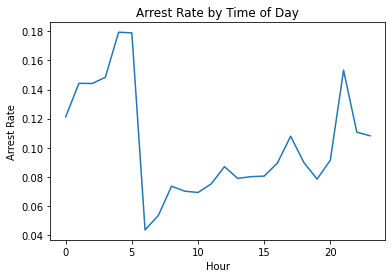

In [ ]:
# graficando la tasa de arrestos por hora
hourly_arrest_rate.plot()

plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

plt.show()

Una pequeña parte de las detenciones en tráfico son encontradas drogas. Evaluemos las detenciones relacionadas con drogas son cada vez más comunes.

In [ ]:
# tasa anual de detenciones relacionadas con drogas
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

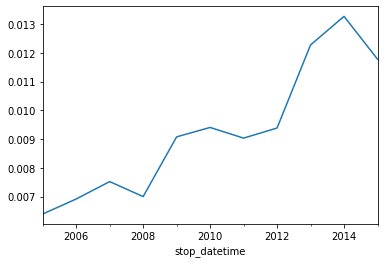

In [ ]:
# graficando
annual_drug_rate.plot()
plt.show()

Podemos ver que las detenciones aumentaron considerablemente entre el 2005 y 2015. Podríamos generar una hipótesis de que la tasa de detenciones vehículares incremento también.

In [ ]:
# tasa de busquedas anuales 
annual_search_rate = ri.search_conducted.resample('A').mean()

In [ ]:
# concatenamos con la tasa anual de detenciones relacionadas con drogas
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
annual.head(3)

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.006390,0.048323
2006-12-31,0.006913,0.039773
2007-12-31,0.007520,0.041567


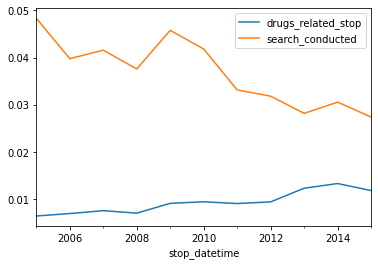

In [ ]:
# graficando
annual.plot()
plt.show()

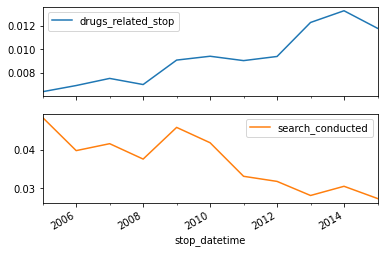

In [ ]:
# una mejor forma de graficar
annual.plot(subplots=True)
plt.show()

### ¿Qué tipo de infracciones se detectan en cada distrito?

In [ ]:
# cross-tabulation 
pd.crosstab(ri.driver_gender, ri.driver_race)

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,551,2681,1953,53,18536
M,1838,9604,7774,212,43334


In [ ]:
# cross-tabulation 
table = pd.crosstab(ri.driver_race, ri.driver_gender)
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


In [ ]:
# verificando que es lo mismo que hacer esto para cada valor
ri[(ri.driver_race == 'Asian') & (ri.driver_gender == 'F')].shape

(551, 16)

In [ ]:
table = table.loc['Asian':'Hispanic']
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


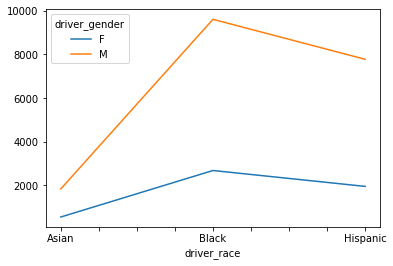

In [ ]:
# graficando
table.plot()
plt.show()

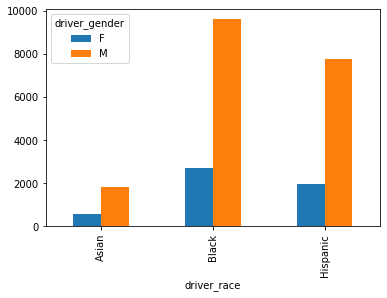

In [ ]:
# una gráfica más apropiada, ya que se trata de categorias es
table.plot(kind='bar')
plt.show()

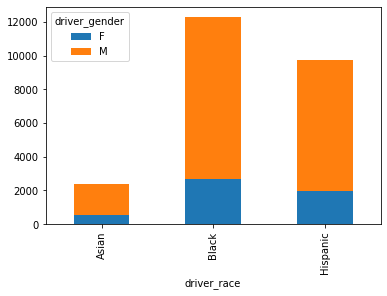

In [ ]:
# stacked bar plot
table.plot(kind='bar', stacked=True)
plt.show()

Contabilizando las infracciones por distrito

In [ ]:
# tabla de frecuencias de distritos e infracciones 
all_zones = pd.crosstab(ri.district, ri.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,673,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,706,695,638,12323
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [ ]:
k_zones = all_zones.loc['Zone K1': 'Zone K3']
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,673,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,706,695,638,12323


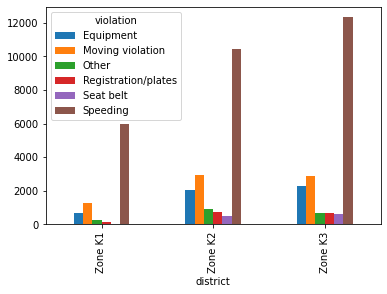

In [ ]:
# graficamos
k_zones.plot(kind='bar')
plt.show()

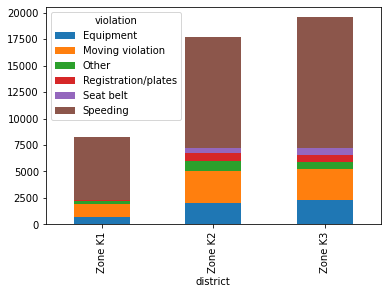

In [ ]:
# graficamos
k_zones.plot(kind='bar', stacked=True)
plt.show()

### ¿Cuánto tiempo podrías ser detenido por una infracción?

In [ ]:
# viaulizando la tasa de búequedas en vehículo por tipo de infracción
search_rate = ri.groupby('violation').search_conducted.mean()
search_rate

violation
Equipment              0.064274
Moving violation       0.057014
Other                  0.045351
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64

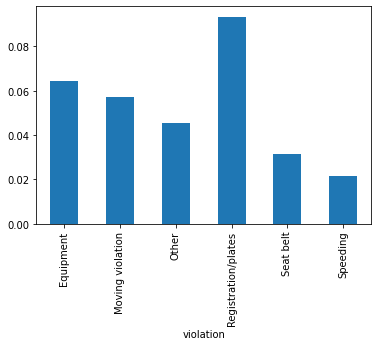

In [ ]:
# visualizando
search_rate.plot(kind='bar')
plt.show()

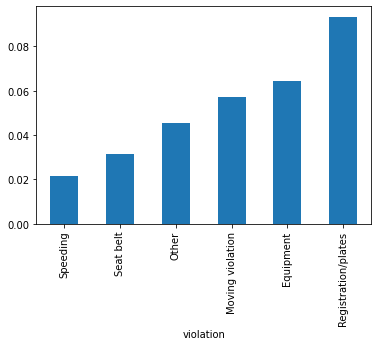

In [ ]:
# mejorando la visualización
search_rate.sort_values().plot(kind='bar')
plt.show()

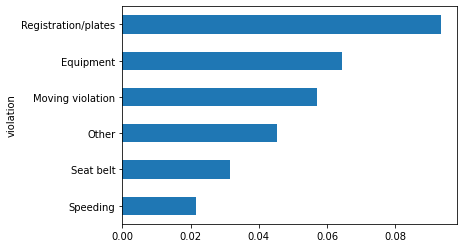

In [ ]:
# mejorando la visualización un poco mas
search_rate.sort_values().plot(kind='barh')
plt.show()

#### Convirtiendo la duración de detenciones a números

Ejemplo utilizando el método ***map()***

```
mapping = {'up':True, 'down':False}

apple['is_up'] = apple.change.map(mapping)

apple
```



In [ ]:
# valores únicos de stop_duration
ri.stop_duration.value_counts()

0-15 Min     69579
16-30 Min    13740
30+ Min       3220
Name: stop_duration, dtype: int64

In [ ]:
mapping = {'0-15 Min':8, 
           '16-30 Min':23, 
           '30+ Min':45
          }
ri['stop_minutes'] = ri.stop_duration.map(mapping)
ri.head(5)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk,stop_minutes
stop_datetime,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8.0
2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False,8.0
2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8.0
2005-02-20 17:15:00,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,False,23.0
2005-02-24 01:20:00,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,False,8.0


In [ ]:
# únicos valores de "stop_minutes"
ri.stop_minutes.unique()

array([ 8., 23., nan, 45.])

#### graficando la duración de detenciones

In [ ]:
stop_length = ri.groupby('violation_raw').stop_minutes.mean()
stop_length

violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64

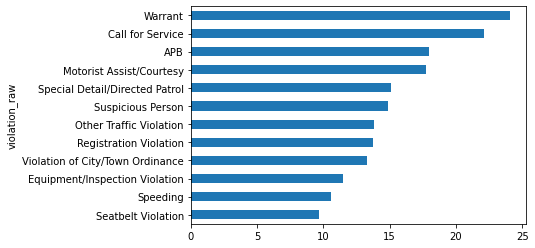

In [ ]:
# ordenando y visualizando
stop_length.sort_values().plot(kind='barh')
plt.show()